# 대학생 정신건강 데이터 분석

대학생의 인구통계학적 정보, 학업과 관련된 요소, 정신건강과 관련된 요소 등을 분석하여 학생들의 정신 건강에 미치는 요인을 분석한다.

## 데이터 읽어오기 및 전처리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/user/데이터 분석을 위한 전처리와 시각화/13장/Student Mental health.csv')
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [3]:
df.info()
# Timestamp 는 DateTime 형식이 아니라 문자열로 구성되어 있음.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [4]:
# 컬럼명 변경
df.columns = ['date', 'gender','age', 'course', 'year', 'CGPA', 'marital_status', 'depression', 'anxiety', 'panic_attack', 'treatment']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            101 non-null    object 
 1   gender          101 non-null    object 
 2   age             100 non-null    float64
 3   course          101 non-null    object 
 4   year            101 non-null    object 
 5   CGPA            101 non-null    object 
 6   marital_status  101 non-null    object 
 7   depression      101 non-null    object 
 8   anxiety         101 non-null    object 
 9   panic_attack    101 non-null    object 
 10  treatment       101 non-null    object 
dtypes: float64(1), object(10)
memory usage: 8.8+ KB


In [5]:
# 학년 속성값 변경
df['year'].unique()

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

In [6]:
def Clean(Text):
    Text = Text[-1]
    Text = int(Text)
    return Text

df['year'] = df['year'].apply(Clean)
print(df['year'][:3])

0    1
1    2
2    1
Name: year, dtype: int64


In [7]:
# CGPA 속성값 변경 : 공백 제거
df['CGPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

In [8]:
def remove_space(x):
    x=x.strip() #문자열 x의 양쪽 끝에 있는 공백 문자(스페이스, 탭, 줄 바꿈 등)를 제거
    return x

df['CGPA'] = df['CGPA'].apply(remove_space)
df['CGPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '2.50 - 2.99', '2.00 - 2.49',
       '0 - 1.99'], dtype=object)

In [9]:
# 학과 속성값 변경
print(df['course'].unique())
print(len(df['course'].unique()))

# Engine, engin, Engineering 처럼 같은 학과가 다르게 표시됨.

['Engineering' 'Islamic education' 'BIT' 'Laws' 'Mathemathics'
 'Pendidikan islam' 'BCS' 'Human Resources' 'Irkhs' 'Psychology' 'KENMS'
 'Accounting ' 'ENM' 'Marine science' 'KOE' 'Banking Studies'
 'Business Administration' 'Law' 'KIRKHS' 'Usuluddin ' 'TAASL' 'Engine'
 'ALA' 'Biomedical science' 'koe' 'Kirkhs' 'BENL' 'Benl' 'IT' 'CTS'
 'engin' 'Econs' 'MHSC' 'Malcom' 'Kop' 'Human Sciences ' 'Biotechnology'
 'Communication ' 'Diploma Nursing' 'Pendidikan Islam ' 'Radiography'
 'psychology' 'Fiqh fatwa ' 'DIPLOMA TESL' 'Koe' 'Fiqh'
 'Islamic Education' 'Nursing ' 'Pendidikan Islam']
49


In [10]:
# 학과 수정 및 개수 확인
df['course'].replace({'engin':'Engineering', 'Engine':'Engineering', 'Islamic education':'Islamic Education', 
                      'Pendidikan islam':'Pendidikan Islam', 'BIT':'IT', 'psychology':'Psychology', 'koe':'Koe',
                      'Kirkhs':'Irkhs', 'KIRKHS':'Irkhs', 'Benl':'BENL', 'Fiqh fatwa':'Fiqh', 'Laws':'Law'}, inplace=True)
len(df['course'].unique())

38

## 학년과 나이 시각화

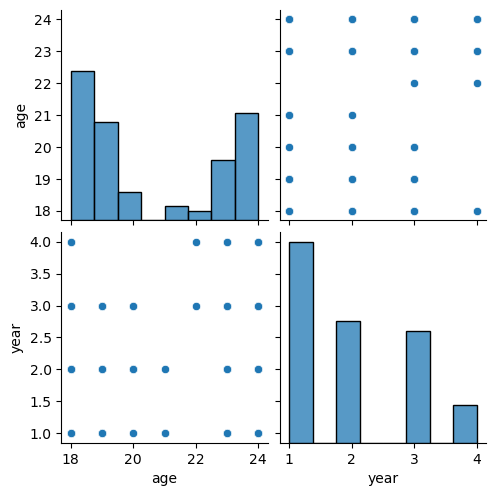

In [11]:
sns.pairplot(df)

18세인 1학년 학생의 분포가 가장 많다.

## 학과와 학년 시각화 

[Text(0, 0, 'Engineering'),
 Text(1, 0, 'IT'),
 Text(2, 0, 'BCS'),
 Text(3, 0, 'Irkhs'),
 Text(4, 0, 'Psychology'),
 Text(5, 0, 'Banking Studies'),
 Text(6, 0, 'ALA'),
 Text(7, 0, 'BENL'),
 Text(8, 0, 'CTS'),
 Text(9, 0, 'Econs'),
 Text(10, 0, 'Malcom'),
 Text(11, 0, 'Biomedical science'),
 Text(12, 0, 'KOE'),
 Text(13, 0, 'Radiography'),
 Text(14, 0, 'Islamic Education')]

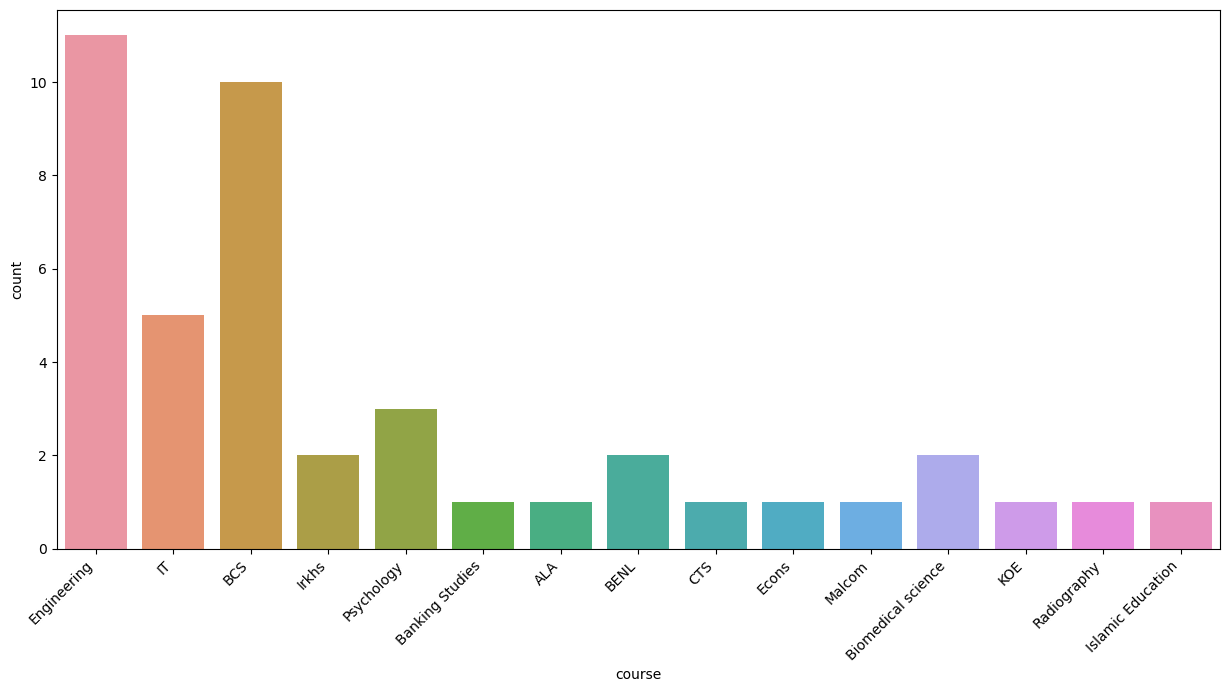

In [12]:
# 학과와 학년 시각화 : 1학년의 전공 분포
plt.figure(figsize=(15,7))
chart = sns.countplot(x='course', data = df[df['year']==1])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

1학년은 엔지니어링 학과와 뇌인지학과와 IT가 가장 많은 분포를 차지하고 있다.

[Text(0, 0, 'Islamic Education'),
 Text(1, 0, 'Engineering'),
 Text(2, 0, 'Pendidikan Islam'),
 Text(3, 0, 'Human Resources'),
 Text(4, 0, 'KENMS'),
 Text(5, 0, 'IT'),
 Text(6, 0, 'Marine science'),
 Text(7, 0, 'KOE'),
 Text(8, 0, 'Business Administration'),
 Text(9, 0, 'BCS'),
 Text(10, 0, 'Usuluddin '),
 Text(11, 0, 'TAASL'),
 Text(12, 0, 'Human Sciences '),
 Text(13, 0, 'Communication '),
 Text(14, 0, 'Diploma Nursing'),
 Text(15, 0, 'Pendidikan Islam '),
 Text(16, 0, 'Koe'),
 Text(17, 0, 'Biomedical science')]

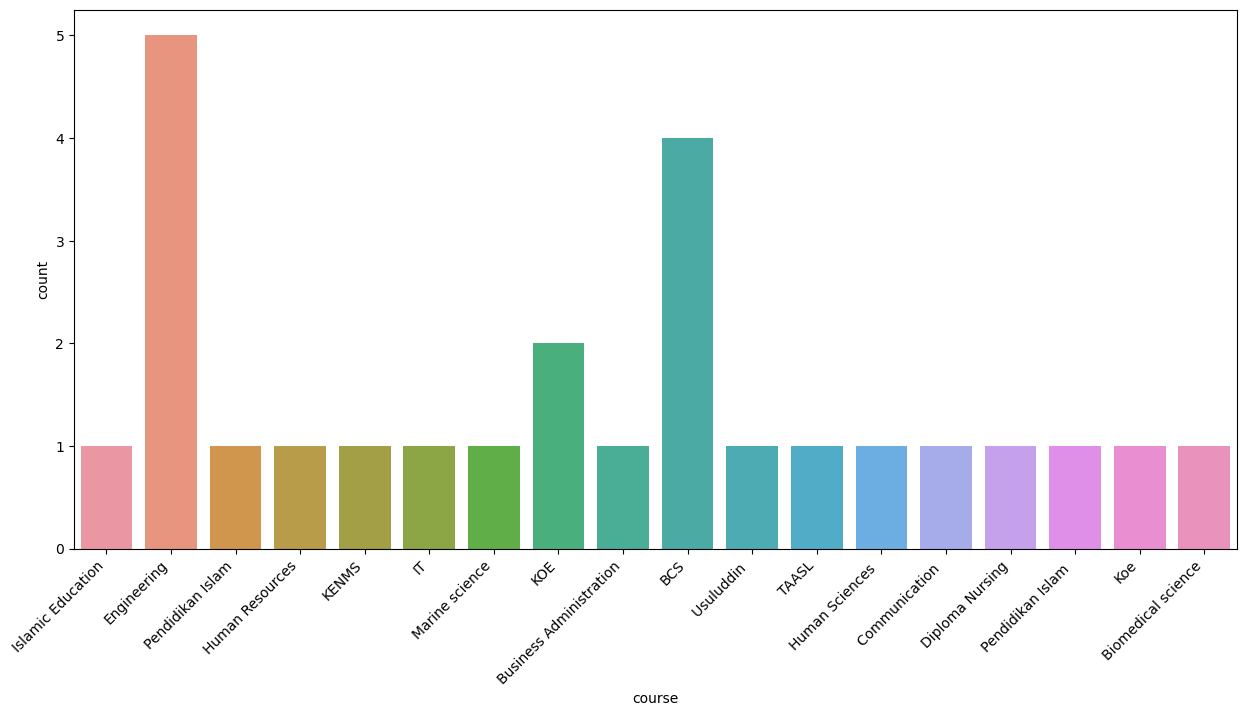

In [13]:
# 학과와 학년 시각화 : 2학년의 전공 분포
plt.figure(figsize=(15,7))
chart = sns.countplot(x='course', data = df[df['year']==2])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

2학년은 엔지니어링 학과와 뇌인지학과가 가장 많은 분포를 차지하고 있다.

[Text(0, 0, 'Law'),
 Text(1, 0, 'Engineering'),
 Text(2, 0, 'BCS'),
 Text(3, 0, 'Accounting '),
 Text(4, 0, 'IT'),
 Text(5, 0, 'Biomedical science'),
 Text(6, 0, 'Koe'),
 Text(7, 0, 'Irkhs'),
 Text(8, 0, 'BENL'),
 Text(9, 0, 'KOE'),
 Text(10, 0, 'MHSC'),
 Text(11, 0, 'Biotechnology'),
 Text(12, 0, 'Fiqh fatwa '),
 Text(13, 0, 'DIPLOMA TESL'),
 Text(14, 0, 'Fiqh'),
 Text(15, 0, 'Nursing ')]

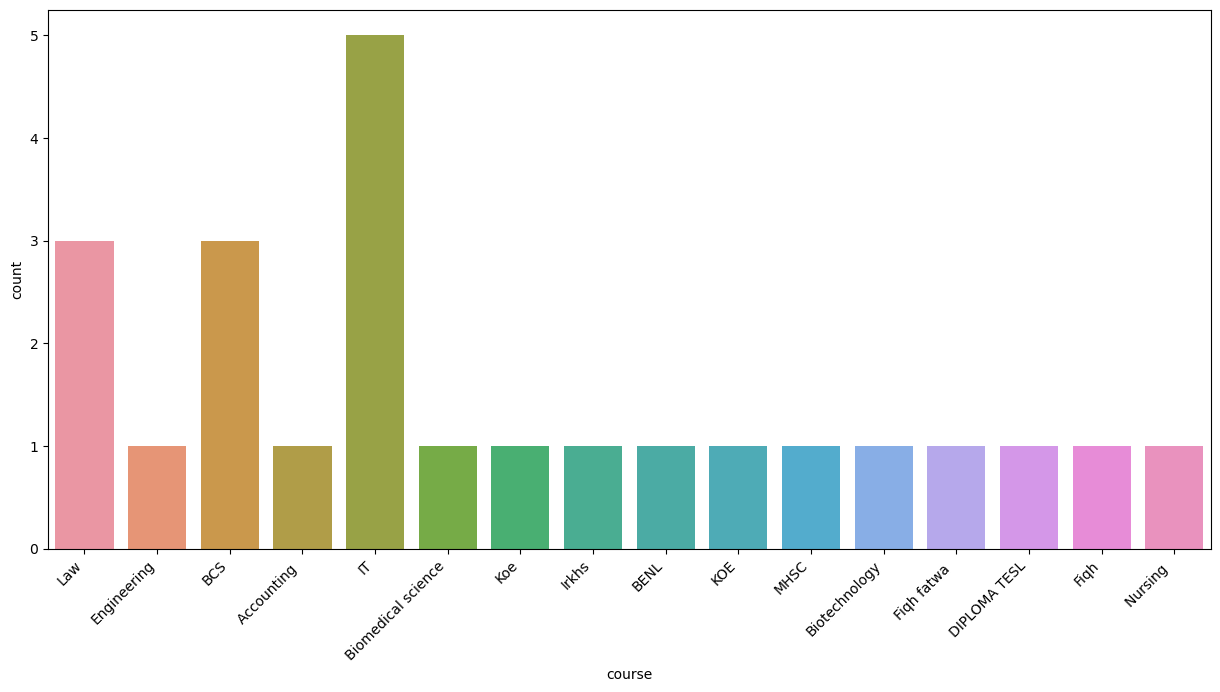

In [14]:
# 학과와 학년 시각화 : 3학년의 전공 
plt.figure(figsize=(15,7))
chart = sns.countplot(x='course', data = df[df['year']==3])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

3학년은 뇌인지과학,법학과 순으로 많이 분포되어 있다.

[Text(0, 0, 'Mathemathics'),
 Text(1, 0, 'ENM'),
 Text(2, 0, 'BCS'),
 Text(3, 0, 'Engineering'),
 Text(4, 0, 'Kop'),
 Text(5, 0, 'Pendidikan Islam')]

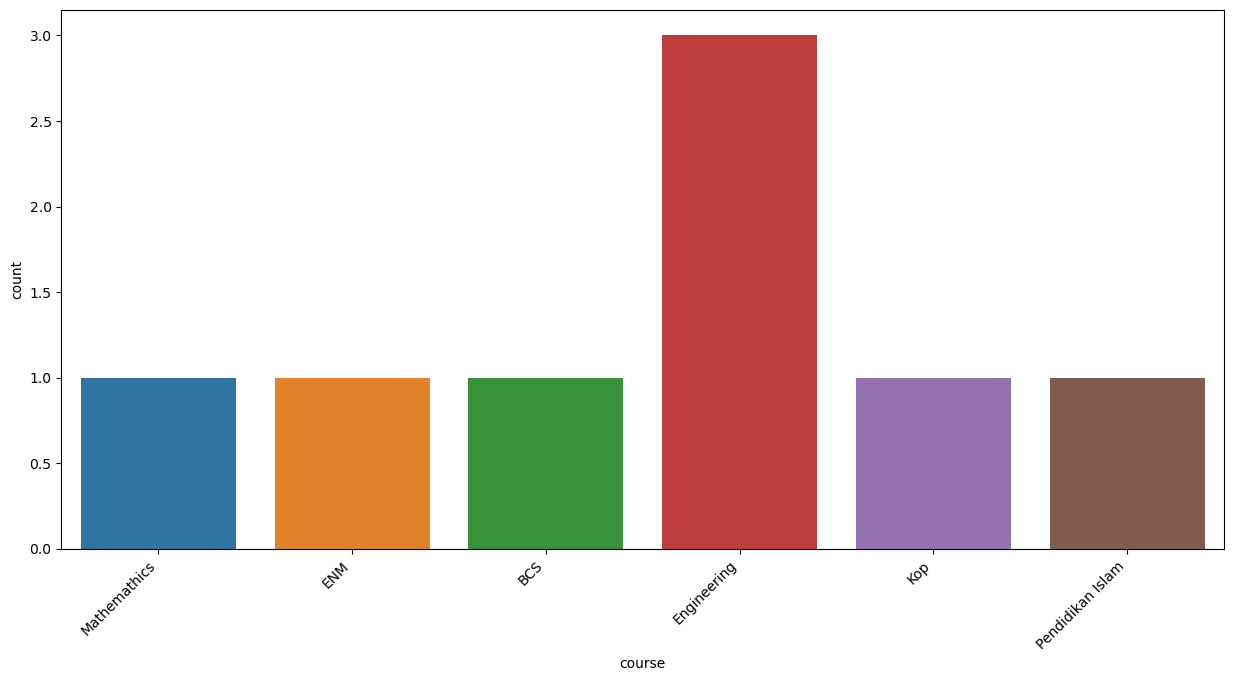

In [15]:
# 학과와 학년 시각화 : 4학년의 전공 
plt.figure(figsize=(15,7))
chart = sns.countplot(x='course', data = df[df['year']==4])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

4학년은 엔지니어링 학과가 가장 많이 분포되어 있다.

## 정신건강과 전공 데이터 시각화

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_11996\2886038972.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='anxiety', y='course', data=df, palette=['red','blue'])


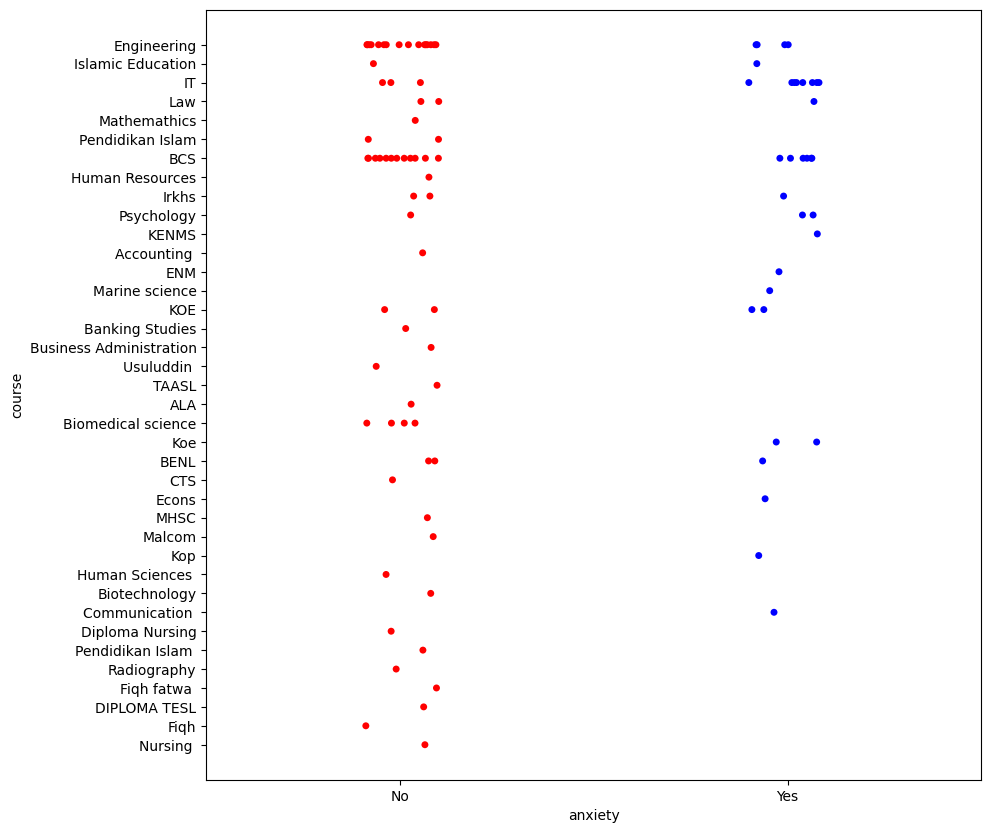

In [16]:
# 불안감과 전공
plt.figure(figsize=(10, 10))
sns.stripplot(x='anxiety', y='course', data=df, palette=['red','blue'])
plt.show()

IT 관련 학과 학생들이 불안감이 있는 것으로 나타났고, 엔지니어링 학과는 불안감이 덜하다.

뇌인지과학 학과의 경우 불안감이 있는 학생과 없는 학생의 분포가 거의 같다.

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_11996\4112719847.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='depression', y='course', data=df, palette=['red','blue'])


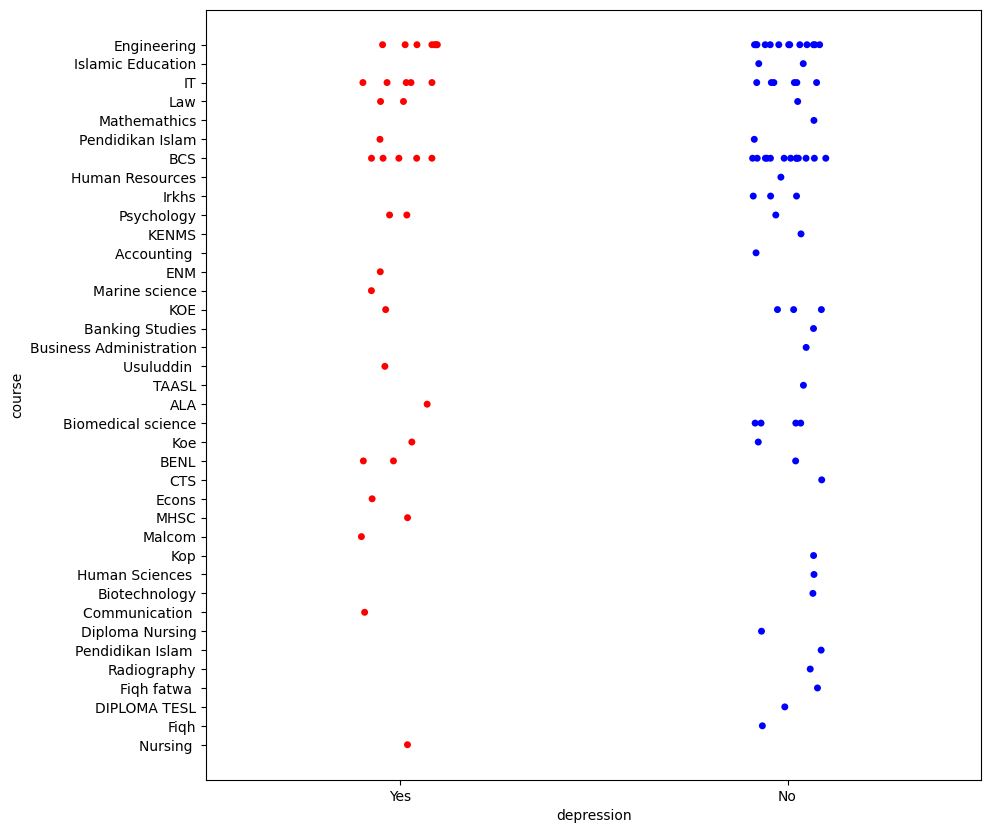

In [17]:
# 우울감과 전공
plt.figure(figsize=(10, 10))
sns.stripplot(x='depression', y='course', data=df, palette=['red','blue'])
plt.show()

심리학과의 경우 우울감이 있는 학생의 비중이 2/3을 차지하고 있다.

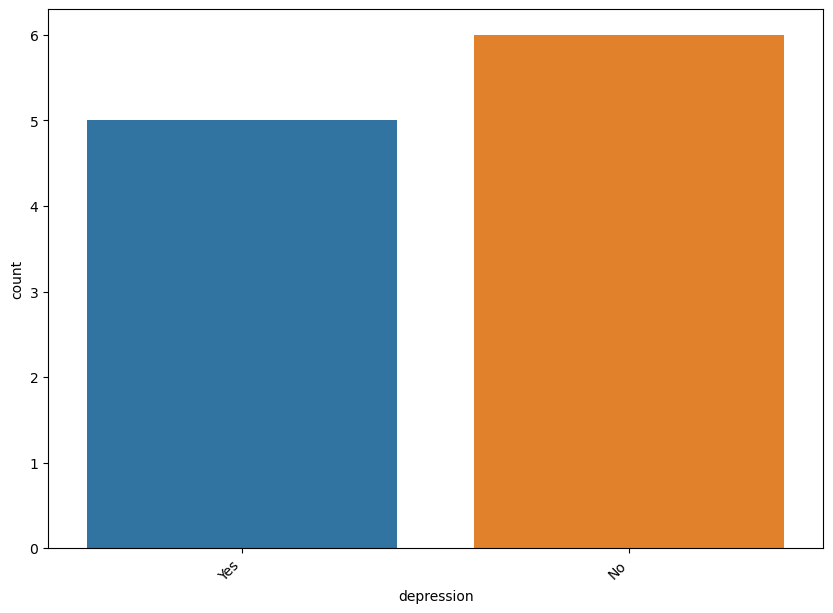

In [18]:
# 우울감 유무에 따른 IT 학생 분포
plt.figure(figsize=(10, 7))
chart = sns.countplot(x='depression', data=df[df['course']=='IT'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

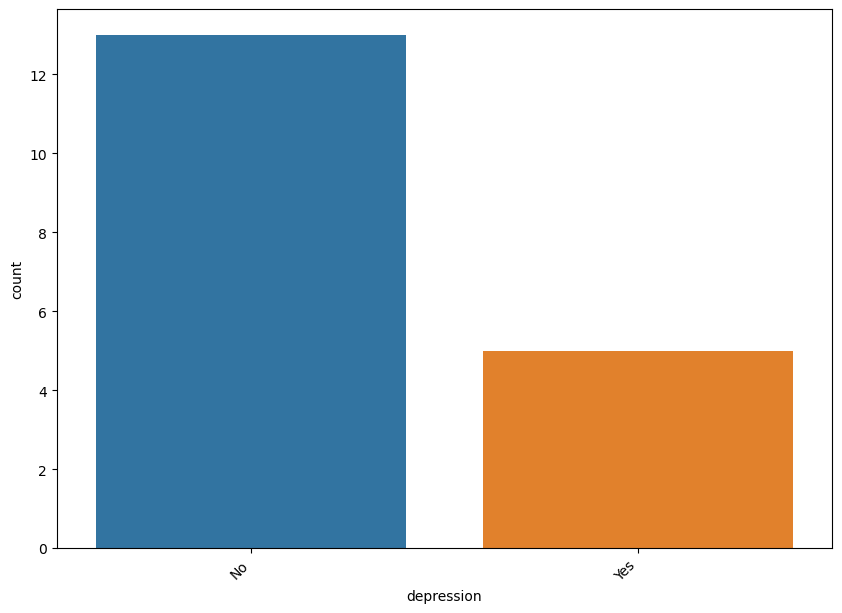

In [19]:
# 우울감 유무에 따른 BCS 학생 분포
plt.figure(figsize=(10, 7))
chart = sns.countplot(x='depression', data=df[df['course']=='BCS'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

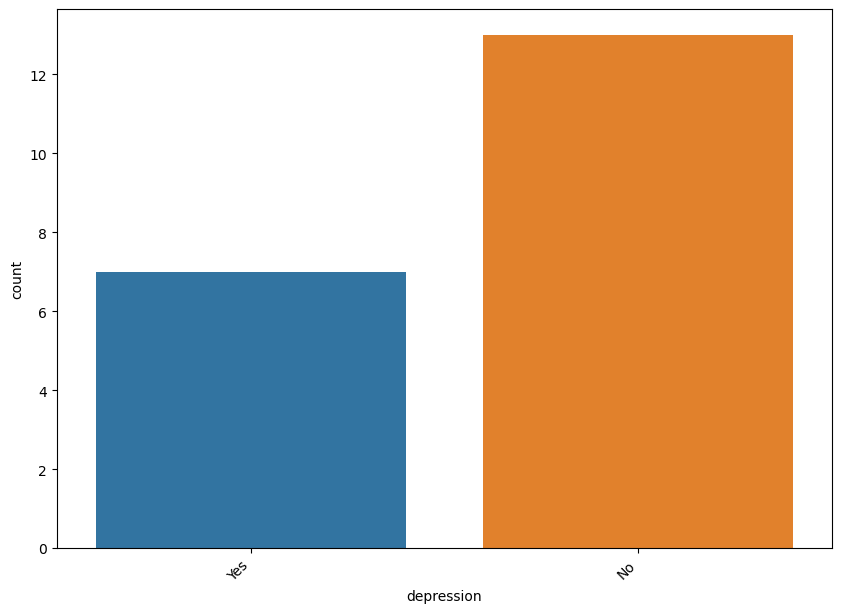

In [20]:
# 우울감 유무에 따른 Engineering 학생 분포
plt.figure(figsize=(10, 7))
chart = sns.countplot(x='depression', data=df[df['course']=='Engineering'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

학생분포가 많은 엔지니어링, 뇌인지과학, IT 관련 학과에 대한 우울감을 경험한 학생의 분포를 확인한 결과, 

IT 관련 학과 학생의 약 50%가 우울감이 있는 것을 알 수 있다.

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_11996\3904101008.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='panic_attack', y='course', data=df, palette=['red','blue'])


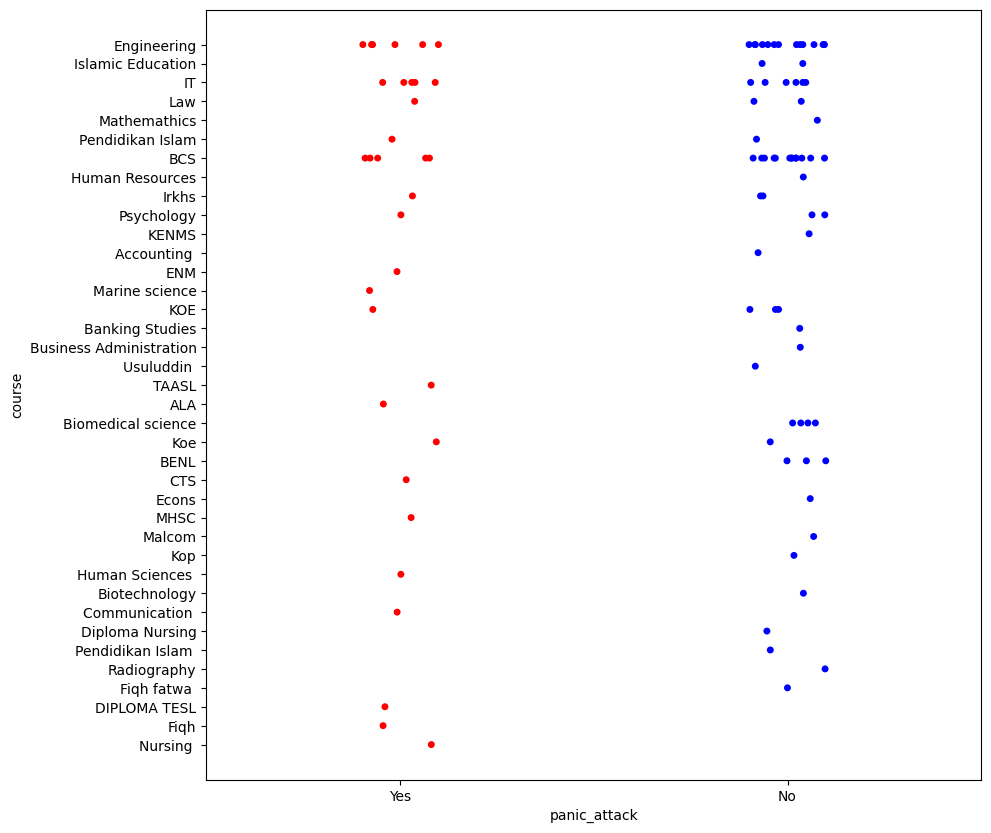

In [22]:
# 공황장애와 전공
plt.figure(figsize=(10, 10))
sns.stripplot(x='panic_attack', y='course', data=df, palette=['red','blue'])
plt.show()

전체적인 분포를 보았을 때, IT 관련 학과 학생이 공황장애를 경험한 비중이 많은 것을 확인할 수 있다.

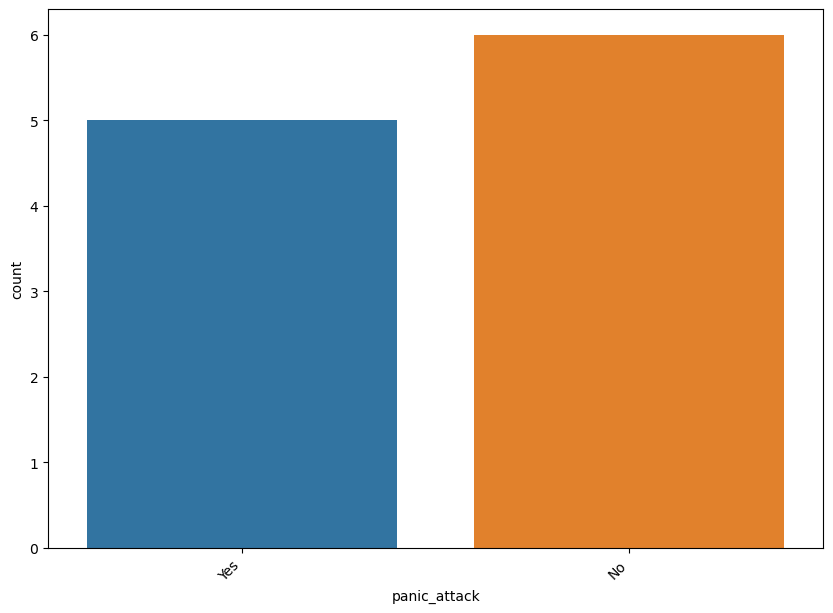

In [23]:
# 공황장애 유무에 따른 IT 학생 분포
plt.figure(figsize=(10, 7))
chart = sns.countplot(x='panic_attack', data=df[df['course']=='IT'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

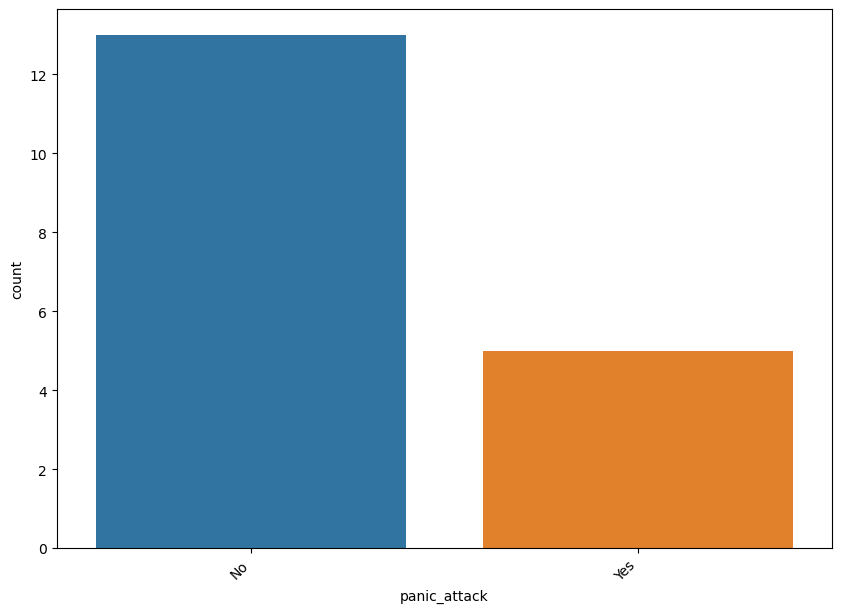

In [24]:
# 공황장애 유무에 따른 BCS 학생 분포
plt.figure(figsize=(10, 7))
chart = sns.countplot(x='panic_attack', data=df[df['course']=='BCS'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

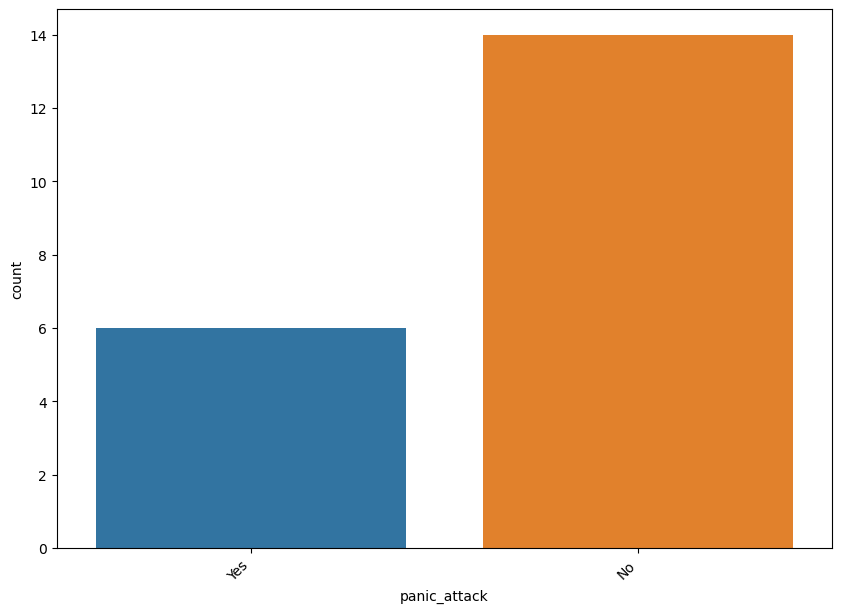

In [25]:
# 공황장애 유무에 따른 Engineering 학생 분포
plt.figure(figsize=(10, 7))
chart = sns.countplot(x='panic_attack', data=df[df['course']=='Engineering'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

IT 학과 학생의 약 46%, 엔지니어링 학과 학생의 30%, 뇌인지과학 학생의 26%가 공황장애를 경험한 것으로 나타났다.

## 정신건강, 나이와 학년 데이터 시각화

우울감, 불안감, 공황장애에 대한 연령과 학년 분포를 확인하기 위해 히스토그램으로 시각화한다.

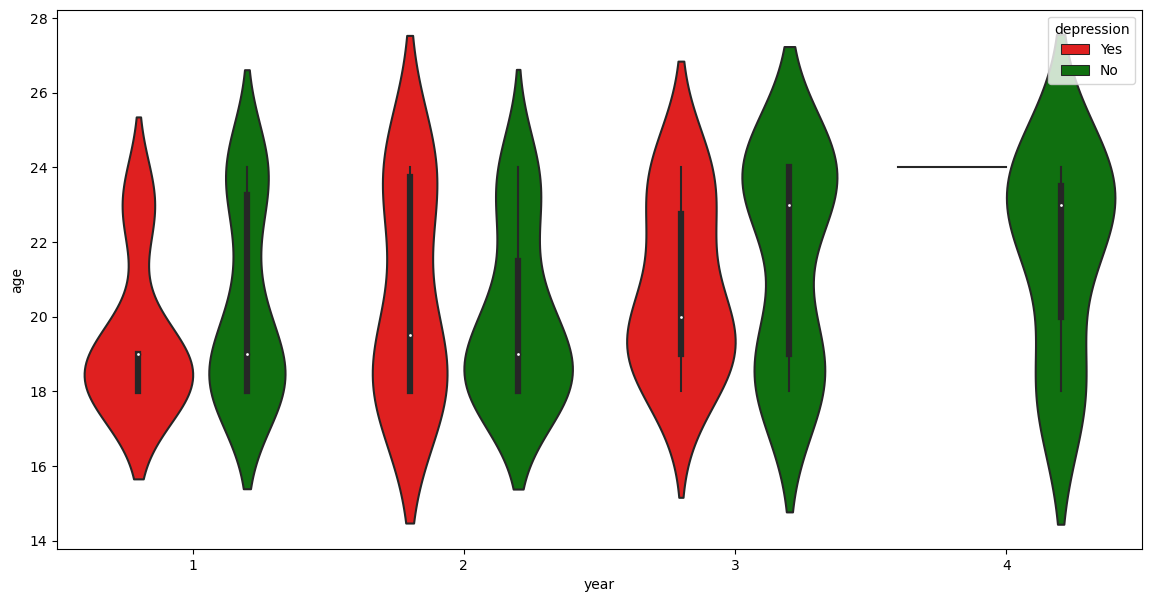

In [26]:
#우울감과 나이, 학년
plt.figure(figsize=(14,7))
sns.violinplot(x='year', y='age', data=df, hue='depression', palette=['red','green'])
plt.show()

분석 결과, 4학년 학생들은 우울감이 없고, 1학년 18세에서 20세 사이의 학생은 우울감을 가장 많이 경험한 것을 확인할 수 있다.

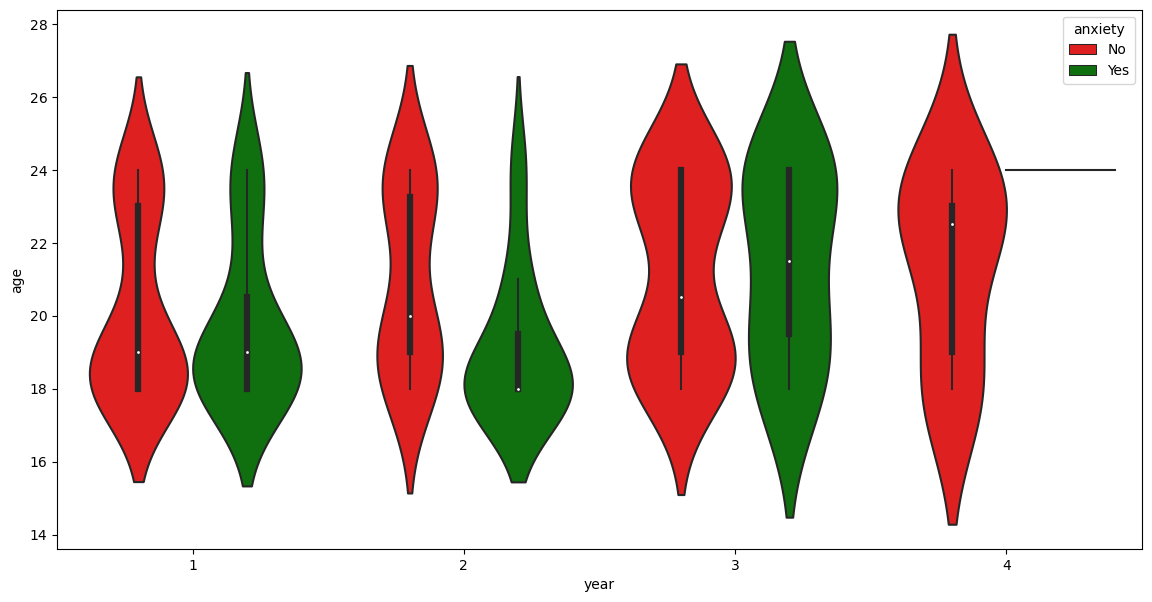

In [27]:
# 불안감과 나이, 학년
plt.figure(figsize=(14,7))
sns.violinplot(x='year', y='age', data=df, hue='anxiety', palette=['red','green'])
plt.show()

분석 결과, 4학년 학생들은 불안감이 없고, 1학년 18-20세 학생, 3학년 학생은 불안감을 많이 경험한 것을 파악할 수 있다.

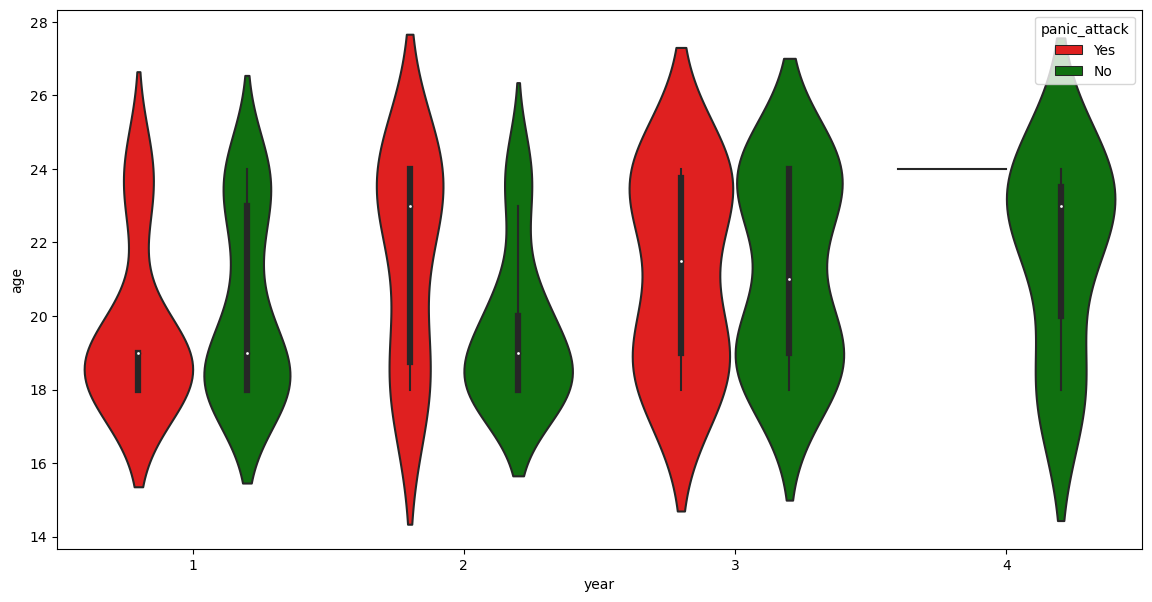

In [29]:
# 공황장애와 나이, 학년
plt.figure(figsize=(14,7))
sns.violinplot(x='year', y='age', data=df, hue='panic_attack', palette=['red','green'])
plt.show()

분석 결과, 공황장애를 경험한 1학년 18~20세 학생이 많이 분포되었고, 3학년은 50% 정도 분포된 것을 알 수 있다.

## 학점과 정신 건강 시각화

앞서 학생들이 18-20세 사이의 1학년일수록 불안감, 우울증, 공황장애를 경험한 경우가 많고 

나이대가 다양한 3학년도 불안감, 우울증, 공황장애를 많이 경험한 것을 확인했다.

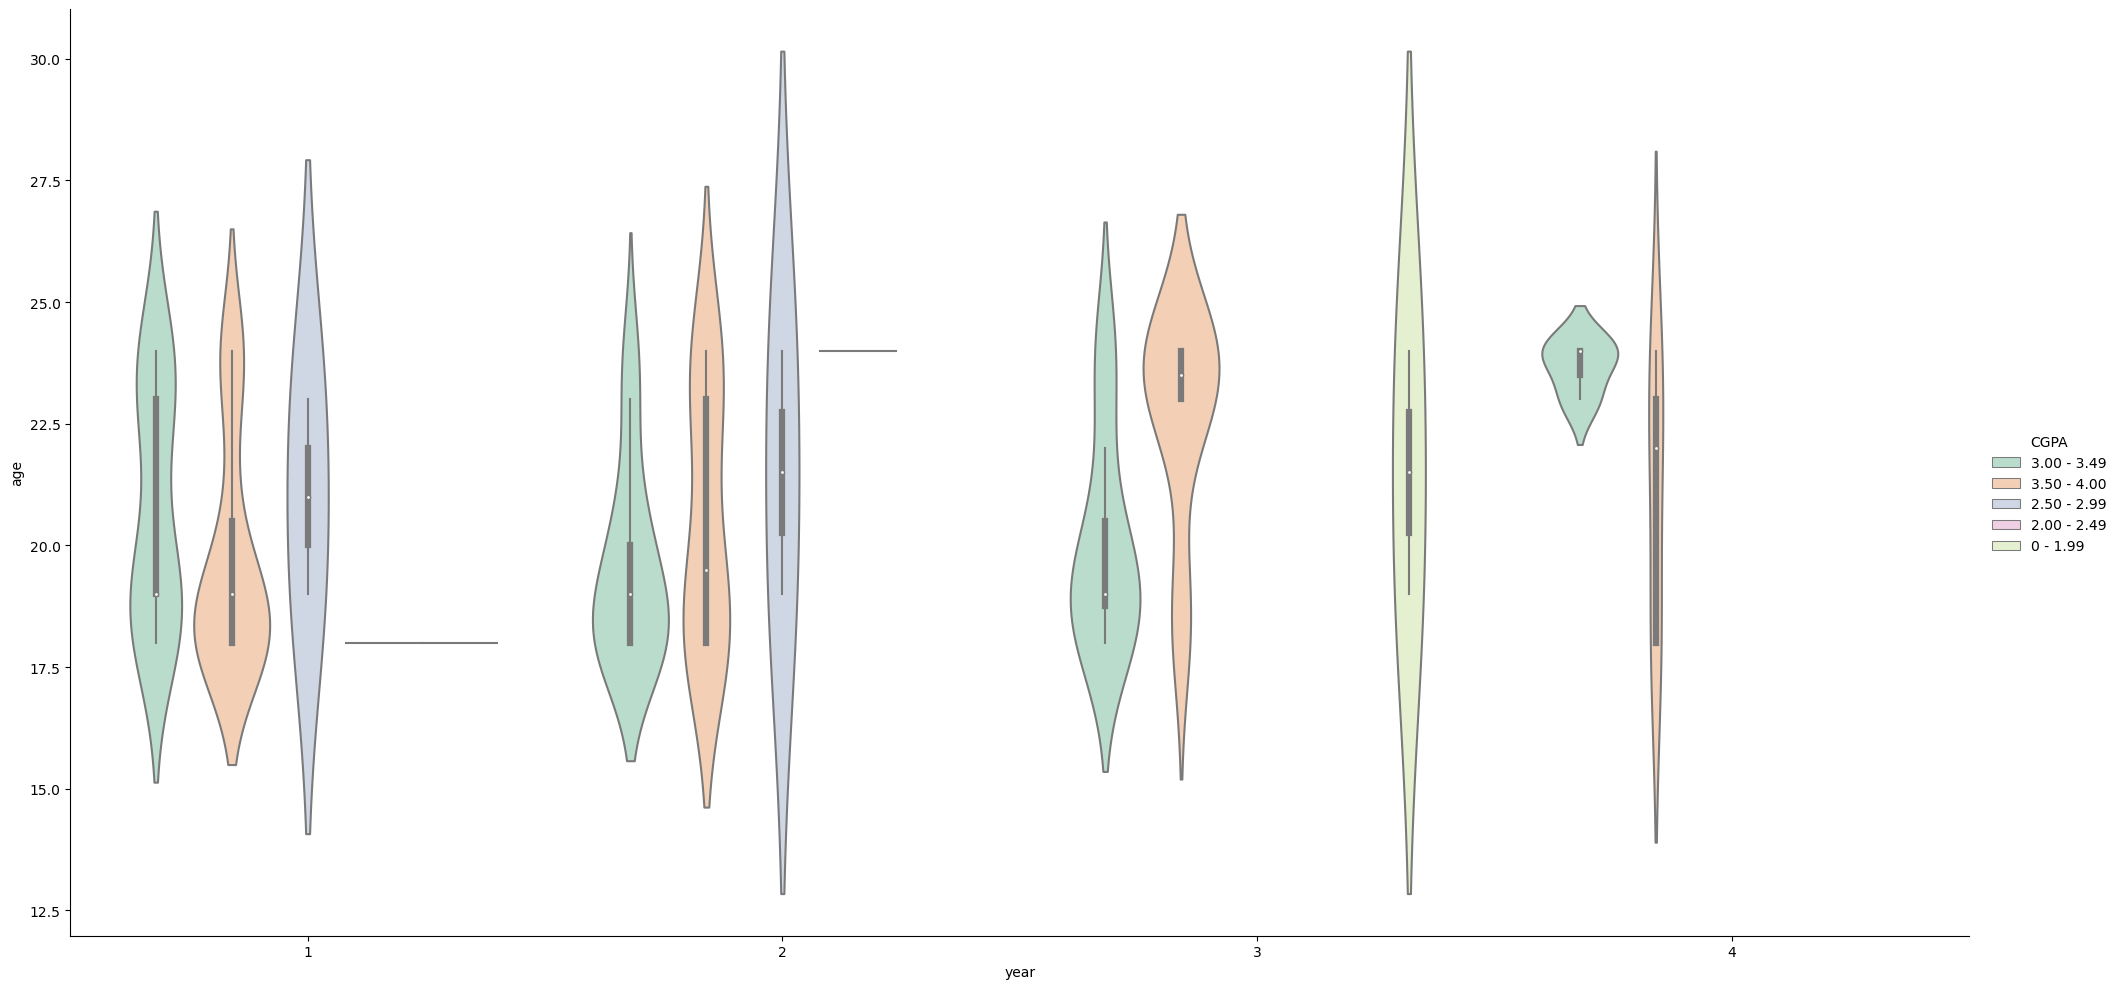

In [31]:
# 학점에 따른 나이와 학년 분포
sns.catplot(data=df, x='year', y='age', hue='CGPA', kind='violin',
           palette='Pastel2', height=10, aspect=2)

분석 결과, 3학년 학생들 중에서 1.99 미만인 학생들이 존재하고, 1학년은 2.50~2.99 사이의 학생들이 많이 분포된 것을 확인할 수 있다.

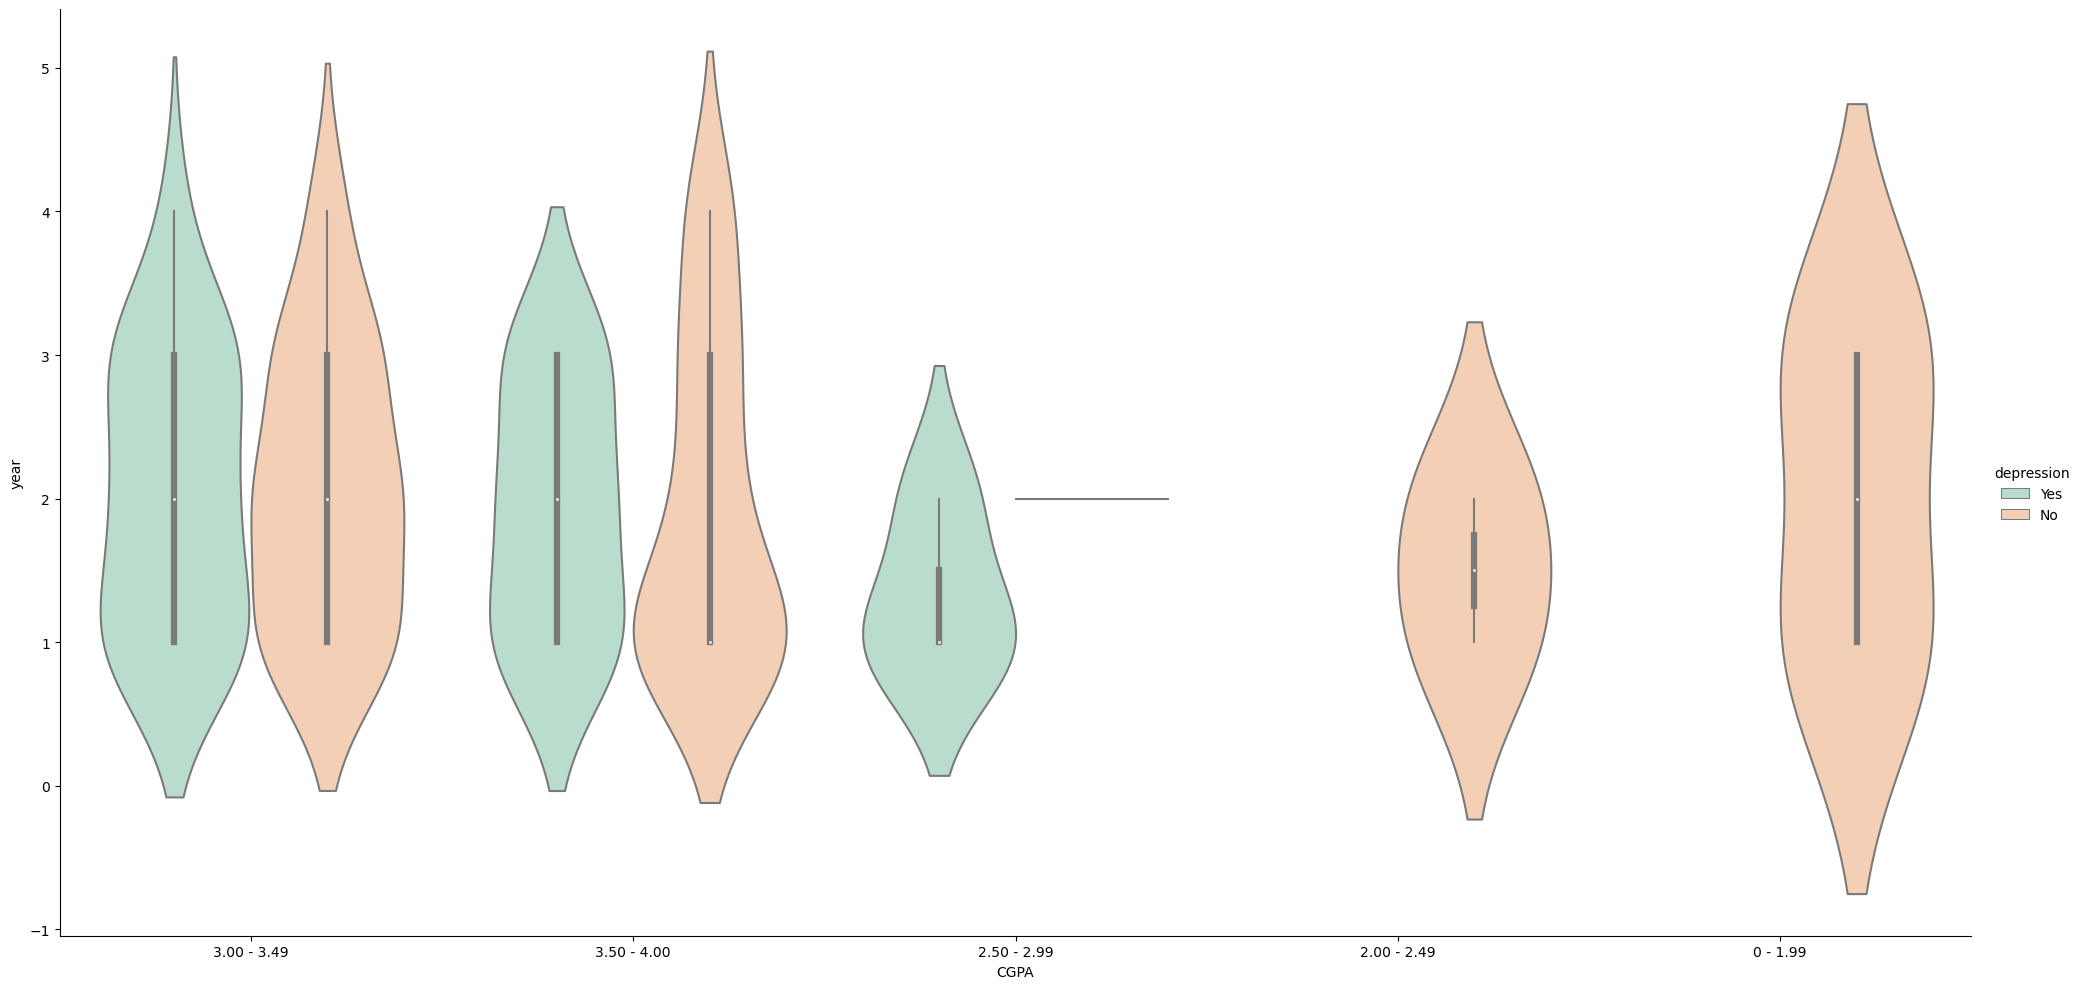

In [33]:
# 학점에 따른 우울감, 학년 시각화
sns.catplot(data=df, x='CGPA', y='year', hue='depression', kind='violin',
           palette='Pastel2', height=10, aspect=2)

1학년은 성적이 2.50 이상부터 우울감을 많이 경험하고, 3학년은 성적이 3.0 이상부터 우울감을 많이 경험하는 것으로 나타났다.

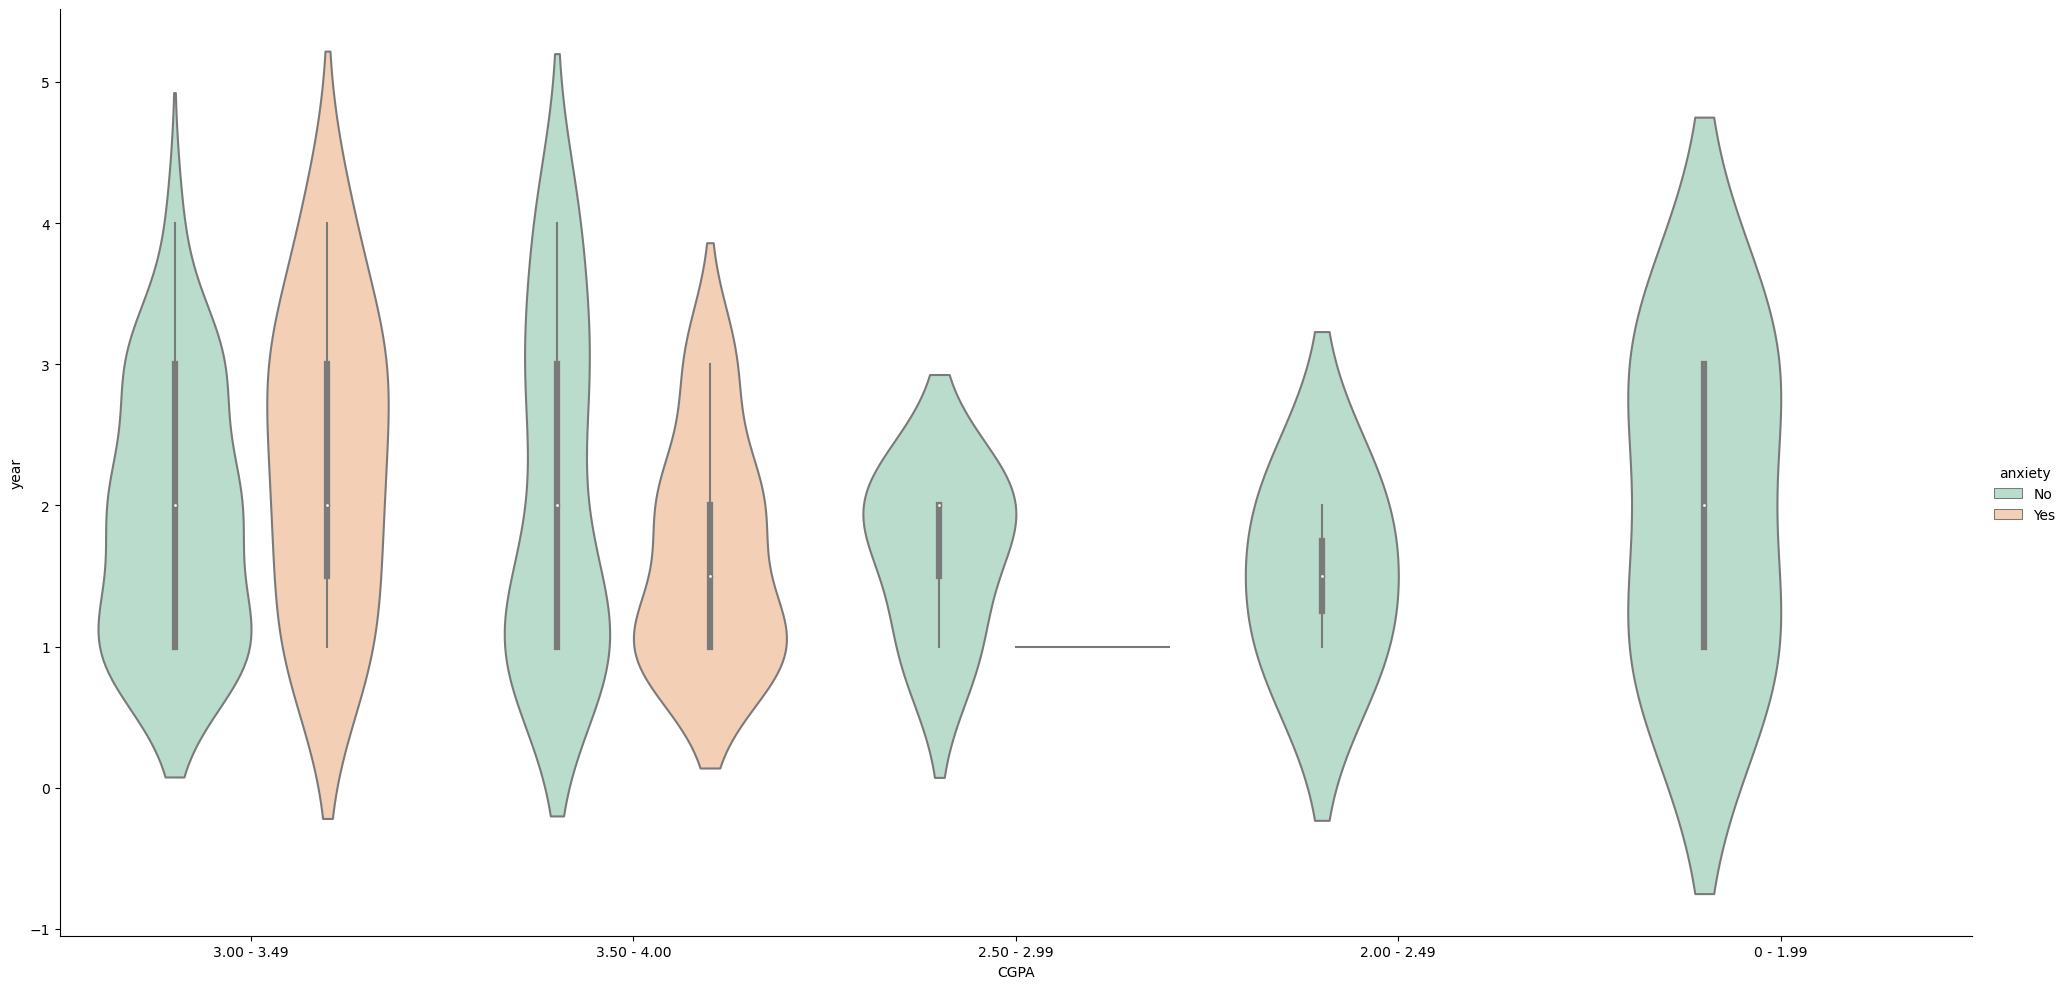

In [34]:
# 학점에 따른 불안감, 학년 시각화
sns.catplot(data=df, x='CGPA', y='year', hue='anxiety', kind='violin',
           palette='Pastel2', height=10, aspect=2)

1학년은 성적이 3.50 이상일 떄 불안감을 경험하는 분포가 많고, 3학년은 성적이 3.00~3.49일 때 불안감을 경험하는 분포가 많은 것을 알 수 있다.

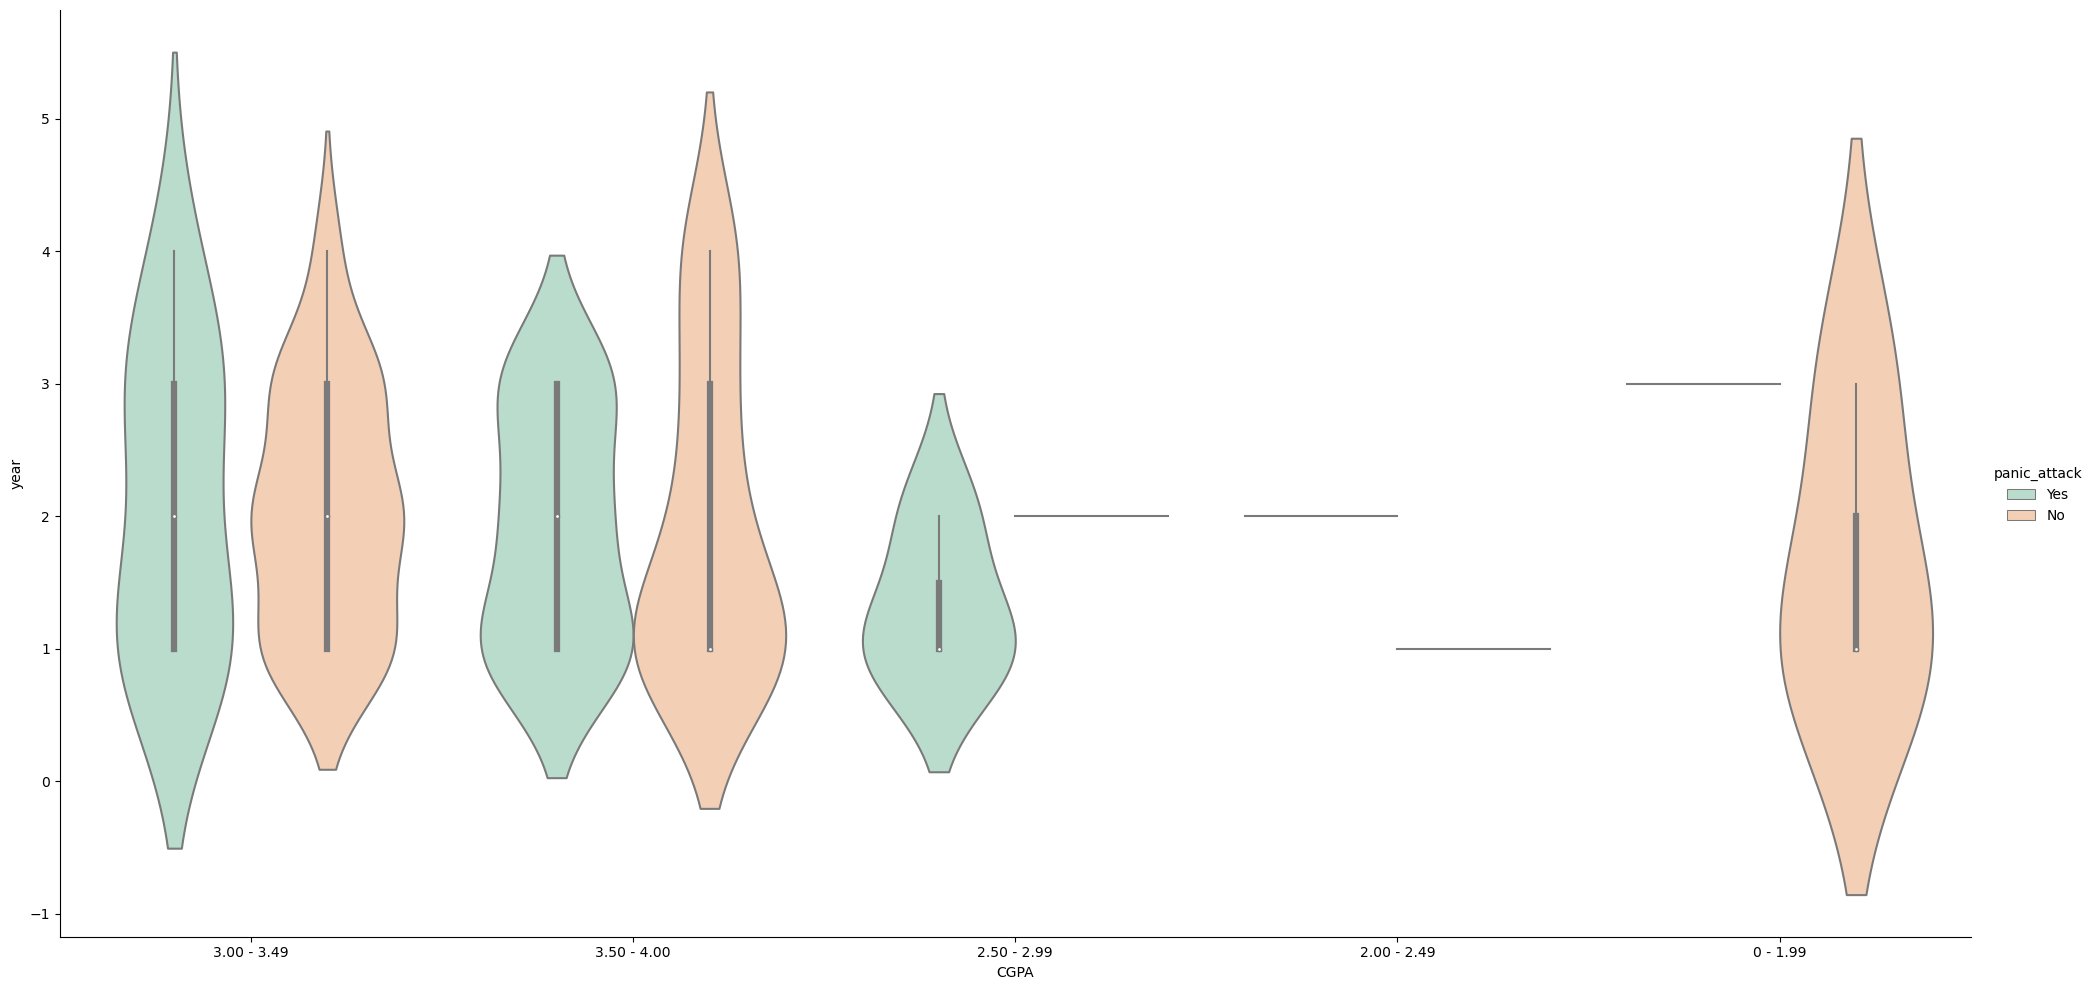

In [37]:
# 학점에 따른 공황장애, 학년 시각화
sns.catplot(data=df, x='CGPA', y='year', hue='panic_attack', kind='violin',
           palette='Pastel2', height=10, aspect=2)

1학년은 성적이 매우 낮을 때보다는 2.50 이상일 때, 3학년은 3.0 이상일 때 공황장애가 발생하는 것을 알 수 있다.

특히 1학년은 성적이 우수한 3.50~4.00 일 때 공황장애가 많이 발생하는 것을 확인할 수 있다.

## 상관관계 분석

상관관계 분석을 위해서는 속성값들이 모두 수치형 데이터로 구성되어 있어야 한다.

In [40]:
# 수치형 데이터로 변환
df['marital_status'].replace({'Yes':1, "No":0}, inplace=True)
df['depression'].replace({'Yes':1, "No":0}, inplace=True)
df['anxiety'].replace({'Yes':1, "No":0}, inplace=True)
df['panic_attack'].replace({'Yes':1, "No":0}, inplace=True)
df['treatment'].replace({'Yes':1, "No":0}, inplace=True)

In [41]:
# 성별 더미변수 변환: 성별(범주형)은 원-핫 인코딩을 통해 수치형으로 변환
df_onehot = pd.get_dummies(df, columns=['gender'])

In [43]:
# 범위로 구성된 CGPA 속성은 평균값으로 변경
df_onehot['CGPA'].replace({'3.00 - 3.49':3.25,'3.50 - 4.00':3.75,
                           '2.50 - 2.99':2.75,'2.00 - 2.49':2.25,'0 - 1.99':0.99}, inplace=True)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_11996\1065950649.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_onehot.corr().round(2)


<Axes: >

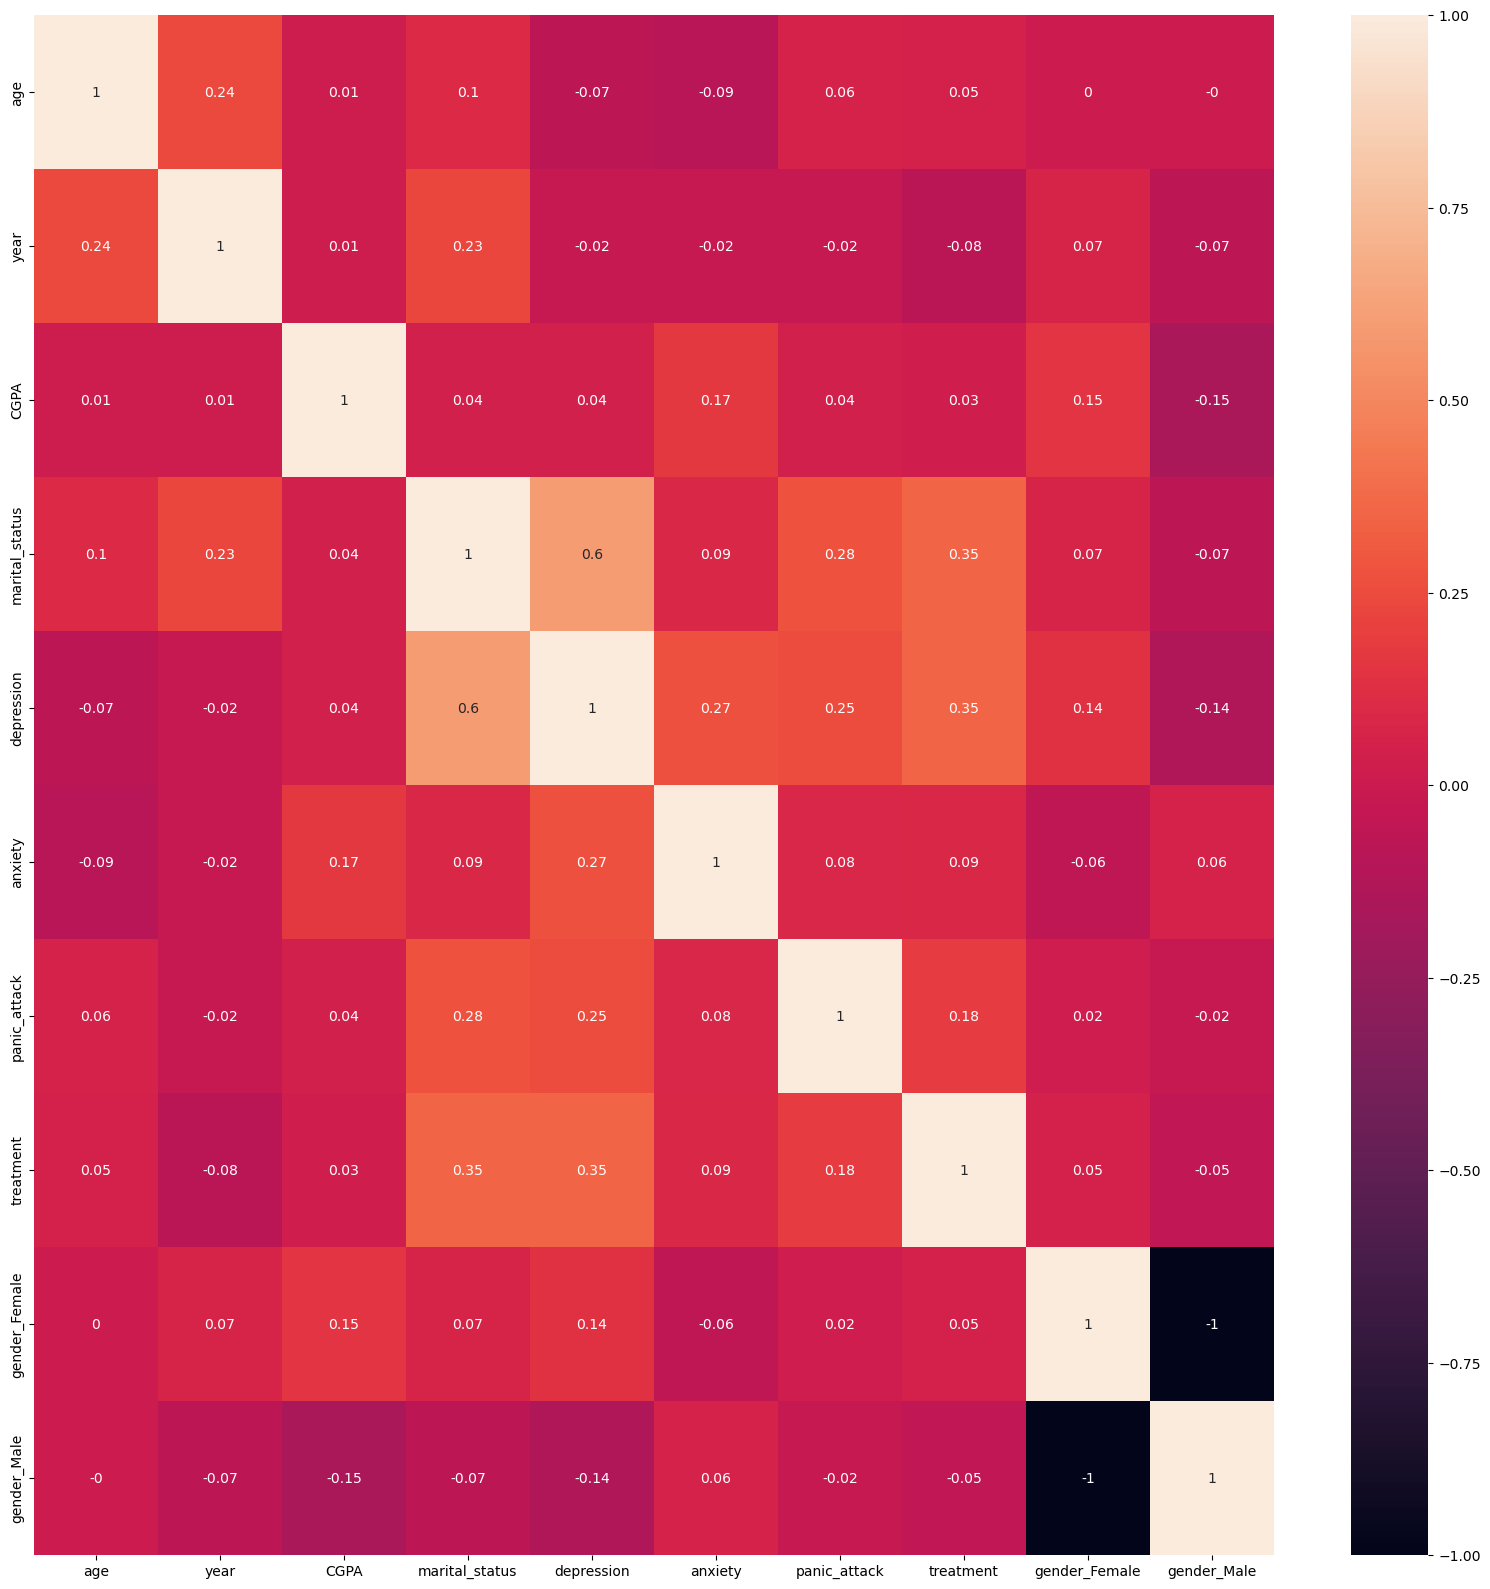

In [44]:
# 상관관계 시각화
corr = df_onehot.corr().round(2)
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)

1. 결혼 유무와 우울증이 밀접한 관련이 있음
2. 공황장애, 우울증, 결혼 유무는 서로 관련이 있음.
3. 우울감, 공황장애, 불안감은 서로 관련이 있음.
4. 나이와 학년 간에 관련이 있음.
5. 학년과 결혼 유무 간에 관련이 있음.
6. 치료 여부, 결혼 유무와 우울감 간에는 관련이 있음.

학생들의 정신 건강에서 불안감은 우울감과 관련이 있다.

우울감은 치료 여부와 불안감, 공황장애, 결혼 여부와 관련이 있다. 

결혼 여부는 학년, 나이에 관련이 있다.

### 결론: 불안감, 우울감, 치료여부, 공황장애, 결혼여부, 학년, 나이가 정신건강과 관련된 주요 요인이다.